<a href="https://colab.research.google.com/github/yehocoh/The-Season-of-NASDAQ-and-S-P500/blob/main/ML_Final_Project_Data_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PIP

In [ ]:
!pip install fredapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 792.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.2/111.2 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 38.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
  

In [ ]:
import pandas as pd
import os
import yfinance as yf
from fredapi import Fred
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

# Preparing Data from Y-Finance - Bonds and Stocks

### SP500

In [ ]:
sp500=yf.Ticker("^GSPC")
df_sp500= pd.DataFrame(sp500.history(period="max"))
df_sp500.reset_index(inplace=True)
df_sp500.rename(columns={"Close": "Close_SP500", "Volume": "Volume_SP500"}, inplace=True)
df_sp500.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], inplace=True)
df_sp500

,Date,Close_SP500,Volume_SP500
0,1927-12-30 00:00:00-05:00,17.660000,0
1,1928-01-03 00:00:00-05:00,17.760000,0
2,1928-01-04 00:00:00-05:00,17.719999,0
3,1928-01-05 00:00:00-05:00,17.549999,0
4,1928-01-06 00:00:00-05:00,17.660000,0
...,...,...,...
23898,2023-02-21 00:00:00-05:00,3997.340088,4121590000
23899,2023-02-22 00:00:00-05:00,3991.050049,4079320000
23900,2023-02-23 00:00:00-05:00,4012.320068,3952940000
23901,2023-02-24 00:00:00-05:00,3970.040039,3877700000


### Nasdaq

In [ ]:
Nasdaq=yf.Ticker('^IXIC')
Nasdaq= pd.DataFrame(Nasdaq.history(period="max"))
Nasdaq.reset_index(inplace=True)
Nasdaq.rename(columns={"Close": "Close_Nasdaq", "Volume": "Volume_Nasdaq"}, inplace=True)
Nasdaq.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], inplace=True)
Nasdaq

,Date,Close_Nasdaq,Volume_Nasdaq
0,1971-02-05 00:00:00-05:00,100.000000,0
1,1971-02-08 00:00:00-05:00,100.839996,0
2,1971-02-09 00:00:00-05:00,100.760002,0
3,1971-02-10 00:00:00-05:00,100.690002,0
4,1971-02-11 00:00:00-05:00,101.449997,0
...,...,...,...
13124,2023-02-21 00:00:00-05:00,11492.299805,5002540000
13125,2023-02-22 00:00:00-05:00,11507.070312,4671270000
13126,2023-02-23 00:00:00-05:00,11590.400391,4714580000
13127,2023-02-24 00:00:00-05:00,11394.940430,4432650000


### Merging Stock DF

In [ ]:
Merged_Stock=[]
Merged_Stock=pd.merge_asof(Nasdaq, df_sp500, on="Date", allow_exact_matches=True)
Merged_Stock

,Date,Close_Nasdaq,Volume_Nasdaq,Close_SP500,Volume_SP500
0,1971-02-05 00:00:00-05:00,100.000000,0,96.930000,20480000
1,1971-02-08 00:00:00-05:00,100.839996,0,97.449997,25590000
2,1971-02-09 00:00:00-05:00,100.760002,0,97.510002,28250000
3,1971-02-10 00:00:00-05:00,100.690002,0,97.389999,19040000
4,1971-02-11 00:00:00-05:00,101.449997,0,97.910004,19260000
...,...,...,...,...,...
13124,2023-02-21 00:00:00-05:00,11492.299805,5002540000,3997.340088,4121590000
13125,2023-02-22 00:00:00-05:00,11507.070312,4671270000,3991.050049,4079320000
13126,2023-02-23 00:00:00-05:00,11590.400391,4714580000,4012.320068,3952940000
13127,2023-02-24 00:00:00-05:00,11394.940430,4432650000,3970.040039,3877700000


Text(0, 0.5, 'Close Index')

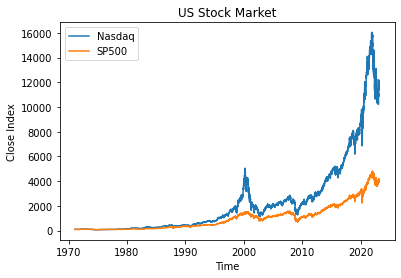

In [ ]:
plt.plot(Merged_Stock.Date, Merged_Stock.Close_Nasdaq, label="Nasdaq")
plt.plot(Merged_Stock.Date, Merged_Stock.Close_SP500, label="SP500")
plt.legend(loc="upper left")
plt.title('US Stock Market')
plt.xlabel('Time')
plt.ylabel('Close Index')

## US Treasury Bonds - Data from Yfinance

### Long Term US Treasury Bonds (20 years and above)

In [ ]:
# Bonds Long Term
Bonds_more_then_20_Years=yf.Ticker("TLT")
Bonds_more_then_20_Years= pd.DataFrame(Bonds_more_then_20_Years.history(period="max"))
Bonds_more_then_20_Years.reset_index(inplace=True)
Bonds_more_then_20_Years.rename(columns={"Close": "Close_Bonds_20more", "Volume": "Volume_Bonds_20more"}, inplace=True)
Bonds_more_then_20_Years.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', "Capital Gains"], inplace=True)
Bonds_more_then_20_Years

,Date,Close_Bonds_20more,Volume_Bonds_20more
0,2002-07-30 00:00:00-04:00,41.130596,6100
1,2002-07-31 00:00:00-04:00,41.640194,29400
2,2002-08-01 00:00:00-04:00,41.877316,25000
3,2002-08-02 00:00:00-04:00,42.306156,52800
4,2002-08-05 00:00:00-04:00,42.492859,61100
...,...,...,...
5176,2023-02-21 00:00:00-05:00,100.389999,22728000
5177,2023-02-22 00:00:00-05:00,101.309998,15165400
5178,2023-02-23 00:00:00-05:00,102.300003,15829100
5179,2023-02-24 00:00:00-05:00,100.970001,21399700


In [ ]:
Bonds_more_then_20_Years.shape

(5181, 3)

### MID Term US Treasury Bonds (7 to 10  years)

In [ ]:
# Bonds for Mid Term
Bonds_Mid_7to10=yf.Ticker("IEF")
Bonds_Mid_7to10= pd.DataFrame(Bonds_Mid_7to10.history(period="max"))
Bonds_Mid_7to10.reset_index(inplace=True)
Bonds_Mid_7to10.rename(columns={"Close": "Close_Bonds_7to10", "Volume": "Volume_Bonds_7to10"}, inplace=True)
Bonds_Mid_7to10.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', "Capital Gains"], inplace=True)
Bonds_Mid_7to10

,Date,Close_Bonds_7to10,Volume_Bonds_7to10
0,2002-07-30 00:00:00-04:00,45.574928,41300
1,2002-07-31 00:00:00-04:00,45.992966,32600
2,2002-08-01 00:00:00-04:00,46.182461,71400
3,2002-08-02 00:00:00-04:00,46.539207,120300
4,2002-08-05 00:00:00-04:00,46.773285,159300
...,...,...,...
5176,2023-02-21 00:00:00-05:00,95.360001,11382100
5177,2023-02-22 00:00:00-05:00,95.529999,30136400
5178,2023-02-23 00:00:00-05:00,95.900002,7059800
5179,2023-02-24 00:00:00-05:00,95.320000,10757200


In [ ]:
Bonds_Mid_7to10.shape

(5181, 3)

### Short Term US Treasury Bonds (1 to 3 years)

In [ ]:
# Bonds for Short term
Bonds_1to3_Years=yf.Ticker("SHV")
Bonds_1to3_Years= pd.DataFrame(Bonds_1to3_Years.history(period="max"))
Bonds_1to3_Years.reset_index(inplace=True)
Bonds_1to3_Years.rename(columns={"Close": "Close_Bonds_1to3", "Volume": "Volume_Bonds_1to3"}, inplace=True)
Bonds_1to3_Years.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits', "Capital Gains"], inplace=True)
Bonds_1to3_Years

,Date,Close_Bonds_1to3,Volume_Bonds_1to3
0,2007-01-11 00:00:00-05:00,94.466309,900
1,2007-01-12 00:00:00-05:00,94.518486,1100
2,2007-01-16 00:00:00-05:00,94.501106,500
3,2007-01-17 00:00:00-05:00,94.553276,8200
4,2007-01-18 00:00:00-05:00,94.544556,23100
...,...,...,...
4055,2023-02-21 00:00:00-05:00,110.129997,15878000
4056,2023-02-22 00:00:00-05:00,110.160004,12698600
4057,2023-02-23 00:00:00-05:00,110.199997,3282300
4058,2023-02-24 00:00:00-05:00,110.209999,3538200


In [ ]:
Bonds_1to3_Years.shape

(4060, 3)

### Merging Bonds DF

In [ ]:
Merged_Bonds=[]
Merged_Bonds=pd.merge_asof(Bonds_more_then_20_Years, Bonds_Mid_7to10, on="Date", allow_exact_matches=True)
Merged_Bonds=pd.merge_asof(Merged_Bonds, Bonds_1to3_Years, on="Date", allow_exact_matches=True)

In [ ]:
Merged_Bonds

,Date,Close_Bonds_20more,Volume_Bonds_20more,Close_Bonds_7to10,Volume_Bonds_7to10,Close_Bonds_1to3,Volume_Bonds_1to3
0,2002-07-30 00:00:00-04:00,41.130596,6100,45.574928,41300,NaN,NaN
1,2002-07-31 00:00:00-04:00,41.640194,29400,45.992966,32600,NaN,NaN
2,2002-08-01 00:00:00-04:00,41.877316,25000,46.182461,71400,NaN,NaN
3,2002-08-02 00:00:00-04:00,42.306156,52800,46.539207,120300,NaN,NaN
4,2002-08-05 00:00:00-04:00,42.492859,61100,46.773285,159300,NaN,NaN
...,...,...,...,...,...,...,...
5176,2023-02-21 00:00:00-05:00,100.389999,22728000,95.360001,11382100,110.129997,15878000.0
5177,2023-02-22 00:00:00-05:00,101.309998,15165400,95.529999,30136400,110.160004,12698600.0
5178,2023-02-23 00:00:00-05:00,102.300003,15829100,95.900002,7059800,110.199997,3282300.0
5179,2023-02-24 00:00:00-05:00,100.970001,21399700,95.320000,10757200,110.209999,3538200.0


Text(0, 0.5, 'Close Index')

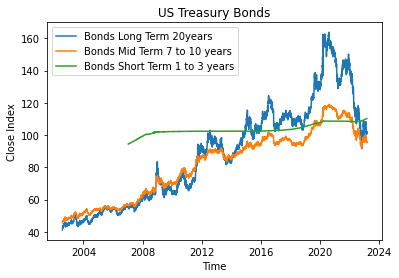

In [ ]:
plt.plot(Merged_Bonds.Date, Merged_Bonds.Close_Bonds_20more, label="Bonds Long Term 20years")
plt.plot(Merged_Bonds.Date, Merged_Bonds.Close_Bonds_7to10, label="Bonds Mid Term 7 to 10 years")
plt.plot(Merged_Bonds.Date, Merged_Bonds.Close_Bonds_1to3, label="Bonds Short Term 1 to 3 years")
plt.legend(loc="upper left")
plt.title('US Treasury Bonds')
plt.xlabel('Time')
plt.ylabel('Close Index')

## Macro Indeces - From FRED (Federal Reserve Economic Data)

In [ ]:
# Access key to FRED
fred = Fred(api_key='2c0158c73eef7066ccfa0b2f47bc4309')

## VIX Index

In [ ]:
vix_data = pd.DataFrame(fred.get_series('VIXCLS'))
vix_data.reset_index(inplace=True)
vix_data.rename(columns={"index": "Date", 0: "VIX"}, inplace=True)
vix_data

,Date,VIX
0,1990-01-02,17.24
1,1990-01-03,18.19
2,1990-01-04,19.22
3,1990-01-05,20.11
4,1990-01-08,20.26
...,...,...
8643,2023-02-17,20.02
8644,2023-02-20,21.23
8645,2023-02-21,22.87
8646,2023-02-22,22.29


## Interest Rates

### Interest Rate for Loans

In [ ]:
Rate_Loan = pd.DataFrame(fred.get_series('FEDFUNDS'))
Rate_Loan.reset_index(inplace=True)
Rate_Loan.rename(columns={"index": "Date", 0: "Loan_Rate"}, inplace=True)
Rate_Loan

,Date,Loan_Rate
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
...,...,...
818,2022-09-01,2.56
819,2022-10-01,3.08
820,2022-11-01,3.78
821,2022-12-01,4.10


### Interest payed for 3-month US Treasury bills

In [ ]:
Rate_3month_bills = pd.DataFrame(fred.get_series('TB3MS'))
Rate_3month_bills.reset_index(inplace=True)
Rate_3month_bills.rename(columns={"index": "Date", 0: "Interest_3M_Bills"}, inplace=True)
Rate_3month_bills

,Date,Interest_3M_Bills
0,1934-01-01,0.72
1,1934-02-01,0.62
2,1934-03-01,0.24
3,1934-04-01,0.15
4,1934-05-01,0.16
...,...,...
1064,2022-09-01,3.13
1065,2022-10-01,3.72
1066,2022-11-01,4.15
1067,2022-12-01,4.25


# Interest payed for 10 Years US Treasury Notes

In [ ]:
Rate_10years_Notes = pd.DataFrame(fred.get_series('DGS10'))
Rate_10years_Notes.reset_index(inplace=True)
Rate_10years_Notes.rename(columns={"index": "Date", 0: "Interest_10y_Notes"}, inplace=True)
Rate_10years_Notes

,Date,Interest_10y_Notes
0,1962-01-02,4.06
1,1962-01-03,4.03
2,1962-01-04,3.99
3,1962-01-05,4.02
4,1962-01-08,4.03
...,...,...
15949,2023-02-20,NaN
15950,2023-02-21,3.95
15951,2023-02-22,3.93
15952,2023-02-23,3.88


### Merging Interest rates

In [ ]:
Interest_Rates=pd.merge_asof(Rate_Loan, Rate_3month_bills, on="Date", allow_exact_matches=True)
Interest_Rates=pd.merge_asof(Interest_Rates, Rate_10years_Notes, on="Date", allow_exact_matches=True)
Interest_Rates

,Date,Loan_Rate,Interest_3M_Bills,Interest_10y_Notes
0,1954-07-01,0.80,0.72,NaN
1,1954-08-01,1.22,0.92,NaN
2,1954-09-01,1.07,1.01,NaN
3,1954-10-01,0.85,0.98,NaN
4,1954-11-01,0.83,0.93,NaN
...,...,...,...,...
818,2022-09-01,2.56,3.13,3.26
819,2022-10-01,3.08,3.72,3.83
820,2022-11-01,3.78,4.15,4.07
821,2022-12-01,4.10,4.25,3.53


Text(0, 0.5, 'Rates [%]')

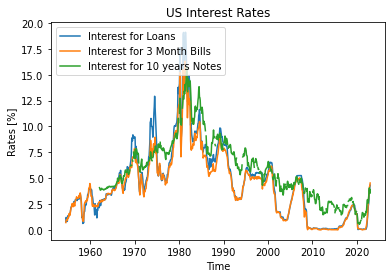

In [ ]:
plt.plot(Interest_Rates.Date, Interest_Rates.Loan_Rate, label="Interest for Loans")
plt.plot(Interest_Rates.Date, Interest_Rates.Interest_3M_Bills, label="Interest for 3 Month Bills")
plt.plot(Interest_Rates.Date, Interest_Rates.Interest_10y_Notes, label="Interest for 10 years Notes")
plt.legend(loc="upper left")
plt.title('US Interest Rates')
plt.xlabel('Time')
plt.ylabel('Rates [%]')

### Un-Employement Rate in USA

In [ ]:
Un_Emp = pd.DataFrame(fred.get_series('UNRATE'))
Un_Emp.reset_index(inplace=True)
Un_Emp.rename(columns={"index": "Date", 0: "UN_EMPL_Rate"}, inplace=True)
Un_Emp

,Date,UN_EMPL_Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5
...,...,...
896,2022-09-01,3.5
897,2022-10-01,3.7
898,2022-11-01,3.6
899,2022-12-01,3.5


### Consumer Price Index (CPI) for All Urban Consumers in US

In [ ]:

CPI = pd.DataFrame(fred.get_series('CPIAUCSL'))
CPI.reset_index(inplace=True)
CPI.rename(columns={"index": "Date", 0: "CPI_Index"}, inplace=True)
CPI

,Date,CPI_Index
0,1947-01-01,21.480
1,1947-02-01,21.620
2,1947-03-01,22.000
3,1947-04-01,22.000
4,1947-05-01,21.950
...,...,...
908,2022-09-01,296.539
909,2022-10-01,297.987
910,2022-11-01,298.598
911,2022-12-01,298.990


### Inflation Rate

In [ ]:
INF = pd.DataFrame(fred.get_series('FPCPITOTLZGUSA'))
INF.reset_index(inplace=True)
INF.rename(columns={"index": "Date", 0: "Inflation"}, inplace=True)
INF

,Date,Inflation
0,1960-01-01,1.457976
1,1961-01-01,1.070724
2,1962-01-01,1.198773
3,1963-01-01,1.239669
4,1964-01-01,1.278912
...,...,...
57,2017-01-01,2.130110
58,2018-01-01,2.442583
59,2019-01-01,1.812210
60,2020-01-01,1.233584


Text(0.5, 0, 'Time')

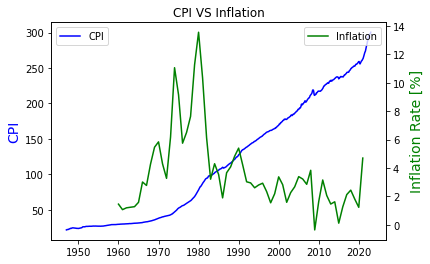

In [ ]:
fig,ax = plt.subplots()
ax.plot(CPI.Date, CPI.CPI_Index, label="CPI", color="blue")
ax.set_ylabel("CPI",color="blue",fontsize=14)
ax2=ax.twinx()
ax2.plot(INF.Date, INF.Inflation, label="Inflation", color="green")
ax2.set_ylabel("Inflation Rate [%]",color="green",fontsize=14)

ax.legend(loc="upper left")
ax2.legend(loc="upper right")
plt.title('CPI VS Inflation')
plt.xlabel('Time')


## Expectation for Inflation

### Inflation forecast for 1 year

In [ ]:
INF_Forc_1Y = pd.DataFrame(fred.get_series('EXPINF1YR'))
INF_Forc_1Y.reset_index(inplace=True)
INF_Forc_1Y.rename(columns={"index": "Date", 0: "Inf_Forc_1Y"}, inplace=True)
INF_Forc_1Y

,Date,Inf_Forc_1Y
0,1982-01-01,6.394507
1,1982-02-01,6.432108
2,1982-03-01,6.387732
3,1982-04-01,6.140628
4,1982-05-01,5.488167
...,...,...
489,2022-10-01,2.881959
490,2022-11-01,3.239048
491,2022-12-01,2.868119
492,2023-01-01,2.679016


### Inflation forecast for 5 years

In [ ]:
INF_Forc_5Y = pd.DataFrame(fred.get_series('T5YIFR'))
INF_Forc_5Y.reset_index(inplace=True)
INF_Forc_5Y.rename(columns={"index": "Date", 0: "Inf_Forc_5Y"}, inplace=True)
INF_Forc_5Y

,Date,Inf_Forc_5Y
0,2003-01-02,1.98
1,2003-01-03,1.96
2,2003-01-06,1.95
3,2003-01-07,1.96
4,2003-01-08,2.09
...,...,...
5253,2023-02-21,2.26
5254,2023-02-22,2.30
5255,2023-02-23,2.28
5256,2023-02-24,2.29


### Inflation forecast for 10 years

In [ ]:
INF_Forc_10Y = pd.DataFrame(fred.get_series('EXPINF10YR'))
INF_Forc_10Y.reset_index(inplace=True)
INF_Forc_10Y.rename(columns={"index": "Date", 0: "Inf_Forc_10Y"}, inplace=True)
INF_Forc_10Y

,Date,Inf_Forc_10Y
0,1982-01-01,6.197611
1,1982-02-01,6.079232
2,1982-03-01,5.648130
3,1982-04-01,5.713188
4,1982-05-01,5.689980
...,...,...
489,2022-10-01,2.370809
490,2022-11-01,2.454670
491,2022-12-01,2.219378
492,2023-01-01,2.285609


### Merging Inflation Forecasts

In [ ]:
Infaltion_Forecast=pd.merge_asof(INF_Forc_1Y, INF_Forc_5Y, on="Date", allow_exact_matches=True)
Infaltion_Forecast=pd.merge_asof(Infaltion_Forecast, INF_Forc_10Y, on="Date", allow_exact_matches=True)
Infaltion_Forecast

,Date,Inf_Forc_1Y,Inf_Forc_5Y,Inf_Forc_10Y
0,1982-01-01,6.394507,NaN,6.197611
1,1982-02-01,6.432108,NaN,6.079232
2,1982-03-01,6.387732,NaN,5.648130
3,1982-04-01,6.140628,NaN,5.713188
4,1982-05-01,5.488167,NaN,5.689980
...,...,...,...,...
489,2022-10-01,2.881959,2.16,2.370809
490,2022-11-01,3.239048,2.37,2.454670
491,2022-12-01,2.868119,2.27,2.219378
492,2023-01-01,2.679016,2.27,2.285609


Text(0, 0.5, 'Rates [%]')

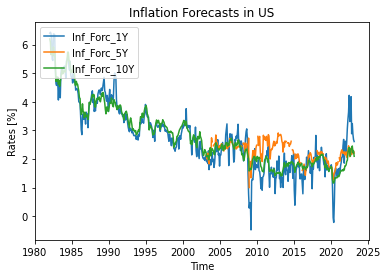

In [ ]:
plt.plot(Infaltion_Forecast.Date, Infaltion_Forecast.Inf_Forc_1Y, label="Inf_Forc_1Y")
plt.plot(Infaltion_Forecast.Date, Infaltion_Forecast.Inf_Forc_5Y, label="Inf_Forc_5Y")
plt.plot(Infaltion_Forecast.Date, Infaltion_Forecast.Inf_Forc_10Y, label="Inf_Forc_10Y")
plt.legend(loc="upper left")
plt.title('Inflation Forecasts in US')
plt.xlabel('Time')
plt.ylabel('Rates [%]')

## Consolidating Data for Model in a new DF 'Consolidated_Data'

In [ ]:
# Copy Nasdaq Data into DF 'Consolidated_Data'
Consolidated_Data=Nasdaq.copy()
Consolidated_Data.set_index("Date", inplace=True)

In [ ]:
# Consolidating Bonds 20 and Bonds 7 to 10 unto DF Consolidated_Data
Temp_Bond=Merged_Bonds[["Date","Close_Bonds_20more", "Close_Bonds_7to10"]].copy()
Temp_Bond.set_index("Date", inplace=True)
Consolidated_Data=pd.merge_asof(Consolidated_Data, Temp_Bond, on="Date", allow_exact_matches=True)
Consolidated_Data.set_index("Date", inplace=True)


### Date format of VIX is UTC, while Date format of 'Consolidated_Data' is 'America/New_York'
### For consolidation of Vix,  it Date format will be converted to  'America/New_York' format

In [ ]:
# Conversion of Date Format
Temp_Vix=vix_data.copy()
Temp_Vix["Date"]=Temp_Vix.apply(lambda x: pd.Series(x.Date).dt.tz_localize('UTC').dt.tz_convert('America/New_York'),
                                axis=1)
Temp_Vix.set_index("Date", inplace=True)

In [ ]:
# Consolidating Vix
Consolidated_Data=pd.merge_asof(Consolidated_Data, Temp_Vix, on="Date", allow_exact_matches=True)

## Adding day of the Week and Holidays according to US Holidays
# Important-in US Date Monday =1

In [ ]:
Consolidated_Data.insert(1, 'WeekDay', Consolidated_Data.apply(lambda x: x.Date.weekday(), axis=1))
Consolidated_Data

import holidays
# Getting Holidays in USA
us_holidays = holidays.US()
Consolidated_Data.insert(2, 'is_holiday', Consolidated_Data.apply(lambda x: x.Date in us_holidays, axis=1))
Consolidated_Data

,Date,WeekDay,is_holiday,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
0,1971-02-05 00:00:00-05:00,4,False,100.000000,0,NaN,NaN,NaN
1,1971-02-08 00:00:00-05:00,0,False,100.839996,0,NaN,NaN,NaN
2,1971-02-09 00:00:00-05:00,1,False,100.760002,0,NaN,NaN,NaN
3,1971-02-10 00:00:00-05:00,2,False,100.690002,0,NaN,NaN,NaN
4,1971-02-11 00:00:00-05:00,3,False,101.449997,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13124,2023-02-21 00:00:00-05:00,1,False,11492.299805,5002540000,100.389999,95.360001,22.87
13125,2023-02-22 00:00:00-05:00,2,False,11507.070312,4671270000,101.309998,95.529999,22.29
13126,2023-02-23 00:00:00-05:00,3,False,11590.400391,4714580000,102.300003,95.900002,21.14
13127,2023-02-24 00:00:00-05:00,4,False,11394.940430,4432650000,100.970001,95.320000,21.14


## Omitting None values from DF

In [ ]:
# Omitting '0' from 'Close_Nasdaq'
Consolidated_Data=Consolidated_Data[Consolidated_Data.Volume_Nasdaq>0]
# Omitting 'None' from 'Close_Nasdaq'
Consolidated_Data=Consolidated_Data[Consolidated_Data.VIX>=0]
# Omitting 'None' from 'Bonds'
Consolidated_Data=Consolidated_Data[Consolidated_Data.Close_Bonds_7to10>=0]
# Checking if any 'None' case exist
print("Any None cases stil exist?", "\033[1m",Consolidated_Data.isnull().values.any(),"\033[0m")

Any None cases stil exist?  False 


In [ ]:
# Saving DF
Consolidated_Data.to_csv("Consolidated_Data.csv", index=False)
print("\033[1m"+"Final Data Set"+"\033[0m")
Consolidated_Data

Final Data Set


,Date,WeekDay,is_holiday,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
7948,2002-07-30 00:00:00-04:00,1,False,1344.189941,1728270000,41.130596,45.574928,31.92
7949,2002-07-31 00:00:00-04:00,2,False,1328.260010,1633300000,41.640194,45.992966,32.03
7950,2002-08-01 00:00:00-04:00,3,False,1280.000000,1548860000,41.877316,46.182461,36.95
7951,2002-08-02 00:00:00-04:00,4,False,1247.920044,1419790000,42.306156,46.539207,41.29
7952,2002-08-05 00:00:00-04:00,0,False,1206.010010,1336720000,42.492859,46.773285,45.08
...,...,...,...,...,...,...,...,...
13124,2023-02-21 00:00:00-05:00,1,False,11492.299805,5002540000,100.389999,95.360001,22.87
13125,2023-02-22 00:00:00-05:00,2,False,11507.070312,4671270000,101.309998,95.529999,22.29
13126,2023-02-23 00:00:00-05:00,3,False,11590.400391,4714580000,102.300003,95.900002,21.14
13127,2023-02-24 00:00:00-05:00,4,False,11394.940430,4432650000,100.970001,95.320000,21.14


In [ ]:
Consolidated_Data.describe()

,WeekDay,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
count,5181.000000,5181.000000,5.181000e+03,5181.000000,5181.000000,5181.000000
mean,2.022583,4913.432868,2.373657e+09,88.211962,81.572464,19.683932
std,1.399004,3689.785454,1.161443e+09,31.511239,20.801133,8.922607
min,0.000000,1114.109985,2.214300e+08,41.130596,45.574928,9.140000
25%,1.000000,2217.419922,1.746320e+09,57.004688,59.283073,13.560000
50%,2.000000,3078.320068,1.982240e+09,90.160492,86.991554,17.200000
75%,3.000000,6873.970215,2.372320e+09,110.447243,97.132553,22.960000
max,4.000000,16057.440430,1.162119e+10,163.784164,119.154648,82.690000


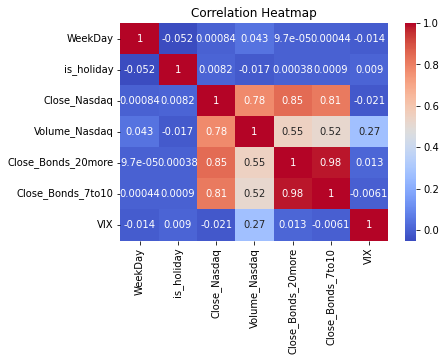

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load your dataset into a pandas dataframe
df = Consolidated_Data

# calculate the correlation matrix
corr = df.corr()

# plot the correlation heatmap using seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
corr

,WeekDay,is_holiday,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX
WeekDay,1.000000,-0.051537,0.000840,0.043052,0.000097,0.000444,-0.014417
is_holiday,-0.051537,1.000000,0.008234,-0.017038,0.000375,0.000900,0.008976
Close_Nasdaq,0.000840,0.008234,1.000000,0.776167,0.846932,0.811529,-0.021437
Volume_Nasdaq,0.043052,-0.017038,0.776167,1.000000,0.550051,0.518174,0.270538
Close_Bonds_20more,0.000097,0.000375,0.846932,0.550051,1.000000,0.981786,0.012987
Close_Bonds_7to10,0.000444,0.000900,0.811529,0.518174,0.981786,1.000000,-0.006077
VIX,-0.014417,0.008976,-0.021437,0.270538,0.012987,-0.006077,1.000000


In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(Consolidated_Data[1:4])

In [ ]:
Consolidated_Data.to_csv()

',Date,WeekDay,is_holiday,Close_Nasdaq,Volume_Nasdaq,Close_Bonds_20more,Close_Bonds_7to10,VIX\n7948,2002-07-30 00:00:00-04:00,1,False,1344.18994140625,1728270000,41.13059616088867,45.574928283691406,31.92\n7949,2002-07-31 00:00:00-04:00,2,False,1328.260009765625,1633300000,41.640193939208984,45.99296569824219,32.03\n7950,2002-08-01 00:00:00-04:00,3,False,1280.0,1548860000,41.877315521240234,46.18246078491211,36.95\n7951,2002-08-02 00:00:00-04:00,4,False,1247.9200439453125,1419790000,42.306156158447266,46.539207458496094,41.29\n7952,2002-08-05 00:00:00-04:00,0,False,1206.010009765625,1336720000,42.49285888671875,46.773284912109375,45.08\n7953,2002-08-06 00:00:00-04:00,1,False,1259.550048828125,1535110000,42.12956619262695,46.39425277709961,42.03\n7954,2002-08-07 00:00:00-04:00,2,False,1280.9000244140625,1542880000,42.230499267578125,46.539207458496094,38.73\n7955,2002-08-08 00:00:00-04:00,3,False,1316.52001953125,1523000000,42.230499267578125,46.37754440307617,36.33\n7956,2002-08-09 00: